In [34]:
import pandas as pd
df = pd.read_csv('MSFT.csv')

In [35]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063906,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400
...,...,...,...,...,...,...,...
9359,2023-05-02,307.760010,309.179993,303.910004,305.410004,305.410004,26404400
9360,2023-05-03,306.619995,308.609985,304.089996,304.399994,304.399994,22360800
9361,2023-05-04,306.239990,307.760010,303.399994,305.410004,305.410004,22519900
9362,2023-05-05,305.720001,311.970001,304.269989,310.649994,310.649994,28181200


In [36]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

In [37]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9359    2023-05-02
9360    2023-05-03
9361    2023-05-04
9362    2023-05-05
9363    2023-05-08
Name: Date, Length: 9364, dtype: object

In [38]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9359   2023-05-02
9360   2023-05-03
9361   2023-05-04
9362   2023-05-05
9363   2023-05-08
Name: Date, Length: 9364, dtype: datetime64[ns]

In [39]:
df.index = df.pop('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063906,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400
...,...,...,...,...,...,...
2023-05-02,307.760010,309.179993,303.910004,305.410004,305.410004,26404400
2023-05-03,306.619995,308.609985,304.089996,304.399994,304.399994,22360800
2023-05-04,306.239990,307.760010,303.399994,305.410004,305.410004,22519900


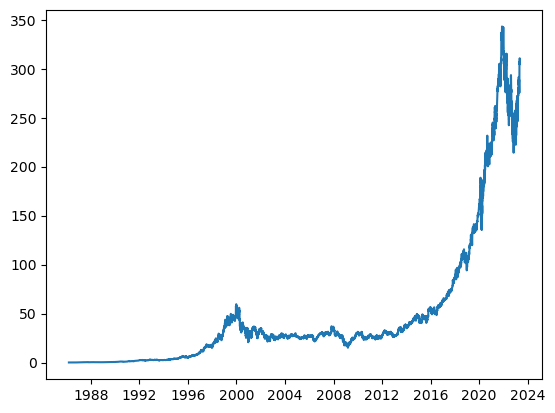

In [40]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [52]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df


windowed_df = df_to_windowed_df(df, 
                                '2021-03-13', 
                                '2023-05-08', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-13,233.779999,232.419998,237.130005,235.750000
1,2021-03-16,237.130005,235.750000,234.809998,237.710007
2,2021-03-17,235.750000,234.809998,237.710007,237.039993
3,2021-03-18,234.809998,237.710007,237.039993,230.720001
4,2021-03-19,237.710007,237.039993,230.720001,230.350006
...,...,...,...,...,...
537,2023-05-02,304.829987,307.260010,305.559998,305.410004
538,2023-05-03,307.260010,305.559998,305.410004,304.399994
539,2023-05-04,305.559998,305.410004,304.399994,305.410004
540,2023-05-05,305.410004,304.399994,305.410004,310.649994


In [53]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)
dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((542,), (542, 3, 1), (542,))

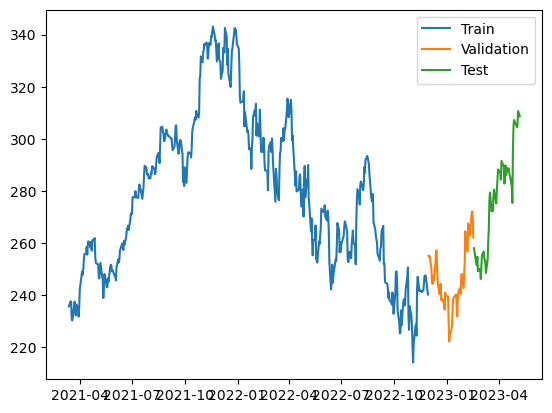

In [54]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
14/14 [==============================] - 2s 33ms/step - loss: 78455.6250 - mean_absolute_error: 278.4561 - val_loss: 60999.3594 - val_mean_absolute_error: 246.6845
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 78261.5234 - mean_absolute_error: 278.1094 - val_loss: 60872.0000 - val_mean_absolute_error: 246.4262
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 78055.6094 - mean_absolute_error: 277.7388 - val_loss: 60592.4336 - val_mean_absolute_error: 245.8582
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 77636.7500 - mean_absolute_error: 276.9852 - val_loss: 60105.1094 - val_mean_absolute_error: 244.8650
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 76877.0234 - mean_absolute_error: 275.6083 - val_loss: 59149.8438 - val_mean_absolute_error: 242.9068
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 75594.6719 - mean_absolute_error: 273.2661 - val_lo

Epoch 49/100
14/14 [==============================] - 0s 4ms/step - loss: 68.3974 - mean_absolute_error: 6.1246 - val_loss: 33.7901 - val_mean_absolute_error: 4.7078
Epoch 50/100
14/14 [==============================] - 0s 4ms/step - loss: 60.0764 - mean_absolute_error: 5.7150 - val_loss: 35.2814 - val_mean_absolute_error: 4.7478
Epoch 51/100
14/14 [==============================] - 0s 4ms/step - loss: 55.6583 - mean_absolute_error: 5.5695 - val_loss: 33.6920 - val_mean_absolute_error: 4.7147
Epoch 52/100
14/14 [==============================] - 0s 4ms/step - loss: 56.4421 - mean_absolute_error: 5.6412 - val_loss: 41.6135 - val_mean_absolute_error: 5.0681
Epoch 53/100
14/14 [==============================] - 0s 4ms/step - loss: 59.5402 - mean_absolute_error: 5.9579 - val_loss: 81.2784 - val_mean_absolute_error: 7.5056
Epoch 54/100
14/14 [==============================] - 0s 4ms/step - loss: 67.1134 - mean_absolute_error: 6.6110 - val_loss: 46.7389 - val_mean_absolute_error: 5.4208
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 30.2834 - mean_absolute_error: 4.3059 - val_loss: 30.1932 - val_mean_absolute_error: 4.3327
Epoch 99/100
14/14 [==============================] - 0s 4ms/step - loss: 39.9340 - mean_absolute_error: 4.9946 - val_loss: 30.9204 - val_mean_absolute_error: 4.3624
Epoch 100/100
14/14 [==============================] - 0s 4ms/step - loss: 34.7822 - mean_absolute_error: 4.5698 - val_loss: 37.2194 - val_mean_absolute_error: 4.9597


14/14 [==============================] - 0s 1ms/step


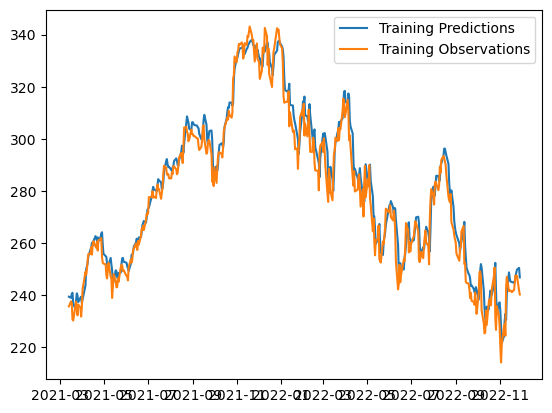

In [58]:
train_predictions = model.predict(x_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 2ms/step


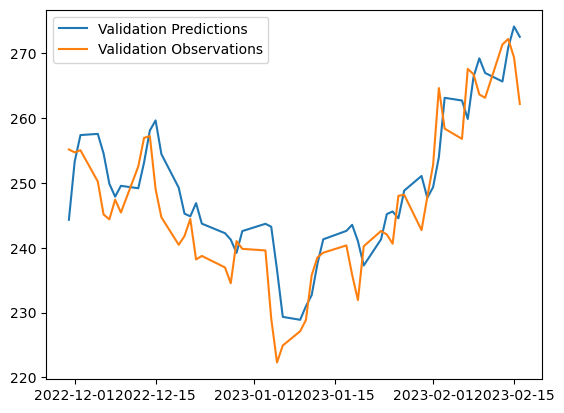

In [59]:
val_predictions = model.predict(x_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 2ms/step


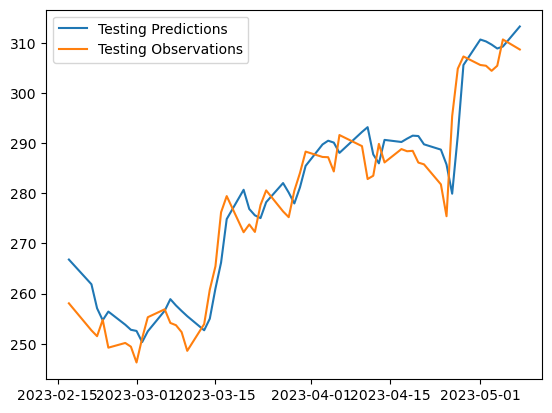

In [61]:
test_predictions = model.predict(x_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

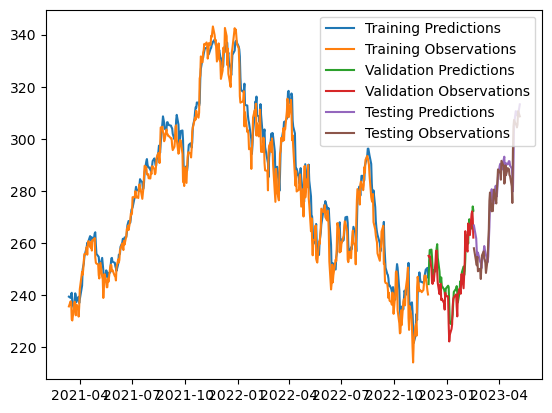

In [62]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [72]:
from copy import deepcopy

recursive_predictions = []
recursive_dates=np.concatenate([dates_val, dates_test])
last_window = deepcopy(x_train[-1])

for target_date in recursive_dates:
    next_prediction=model.predict(np.array([last_window[-3:]])).flatten()
    recursive_predictions.append(next_prediction)
    last_window=np.concatenate((last_window,[next_prediction]))

1/1 [==============================] - 0s 16ms/step


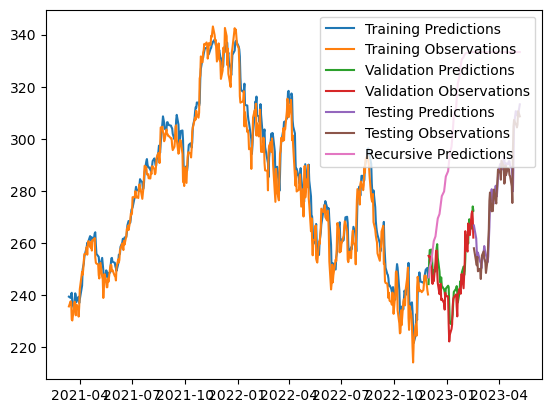

In [73]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])